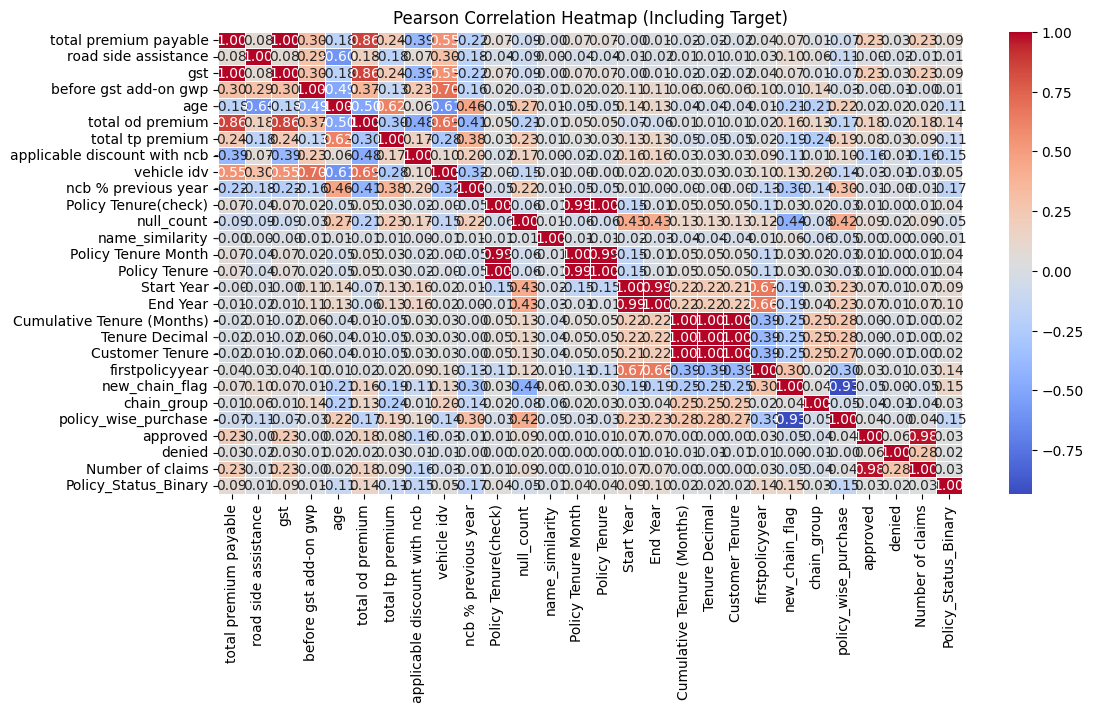

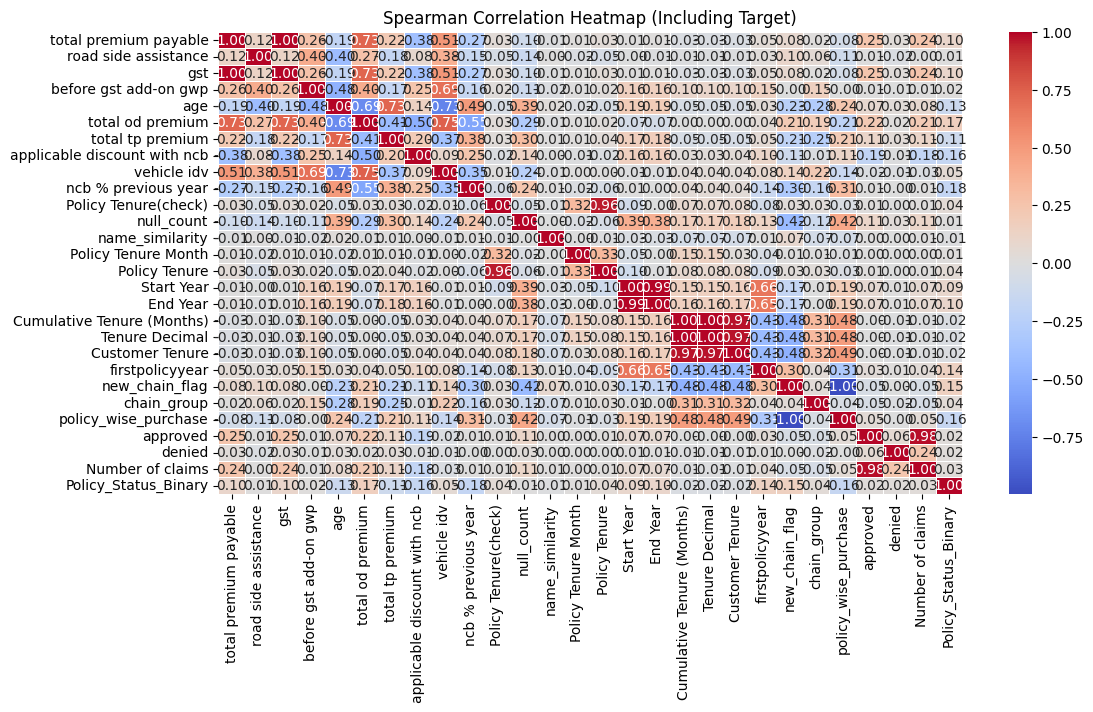


Highly Correlated Numerical Features (Pearson Correlation > 0.9):
gst <--> total premium payable | Correlation: 1.00
Policy Tenure Month <--> Policy Tenure(check) | Correlation: 0.99
Policy Tenure <--> Policy Tenure(check) | Correlation: 1.00
Policy Tenure <--> Policy Tenure Month | Correlation: 0.99
End Year <--> Start Year | Correlation: 0.99
Tenure Decimal <--> Cumulative Tenure (Months) | Correlation: 1.00
Customer Tenure <--> Cumulative Tenure (Months) | Correlation: 1.00
Customer Tenure <--> Tenure Decimal | Correlation: 1.00
policy_wise_purchase <--> new_chain_flag | Correlation: -0.93
Number of claims <--> approved | Correlation: 0.98

Pearson Correlation of Numerical Features with Target (Policy Status Binary):
                              Policy_Status_Binary
ncb % previous year                       0.172110
new_chain_flag                            0.154472
applicable discount with ncb              0.150481
policy_wise_purchase                      0.149188
total od premi

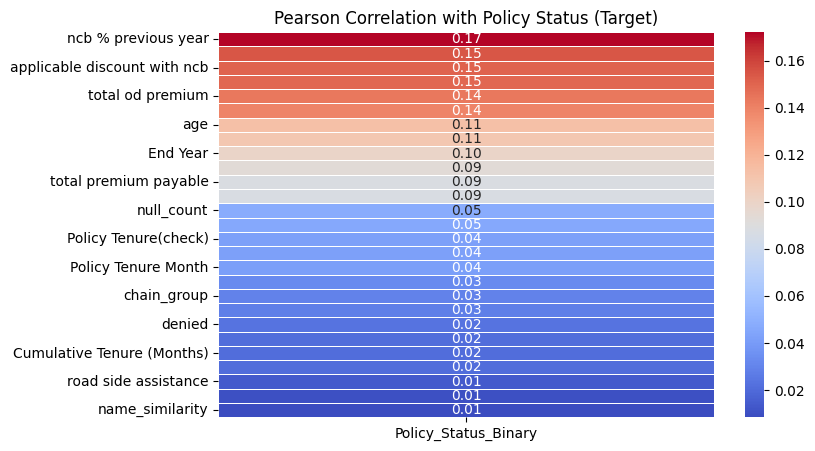

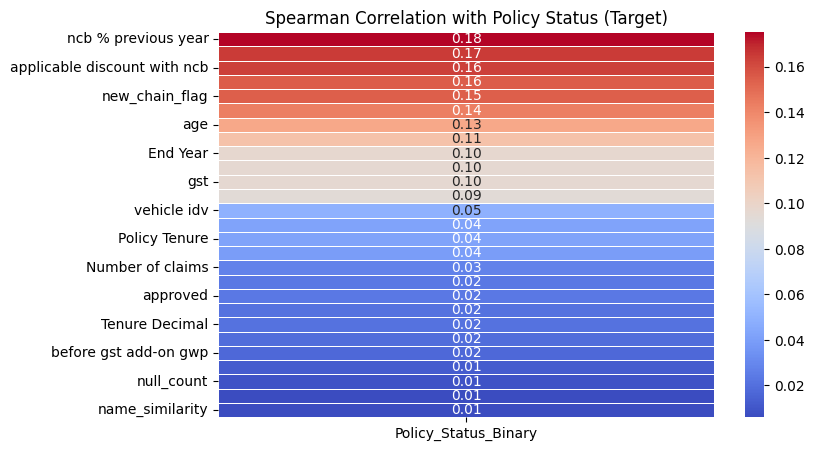


Chi-Square Test Results (Categorical Features vs. Target):
policy no: p-value = 0.28995 (Not Significant)
product name: p-value = 0.00000 (Significant)
biztype: p-value = 0.00000 (Significant)
chassis number: p-value = 1.00000 (Not Significant)
new vertical: p-value = 0.00000 (Significant)
zone 2: p-value = 0.00000 (Significant)
month: p-value = 0.00000 (Significant)
enginenumber: p-value = 1.00000 (Not Significant)
rto location: p-value = 0.00000 (Significant)
state2: p-value = 0.00000 (Significant)
tie up: p-value = 0.00000 (Significant)
new branch name 2: p-value = 0.00000 (Significant)
manufacturer/make: p-value = 0.00000 (Significant)
model: p-value = 0.00000 (Significant)
data: p-value = 0.00000 (Significant)
insured name: p-value = 0.00000 (Significant)
fuel type: p-value = 0.00000 (Significant)
reg no: p-value = 0.00000 (Significant)
variant: p-value = 0.00000 (Significant)
Trim Policy No: p-value = 0.27825 (Not Significant)
Cleaned insured name: p-value = 0.00000 (Significant

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.updated_overall_cleaned_data;'
df = pd.read_sql(query, con=engine)

# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Fill missing values for numerical columns with 0
df[numerical_features] = df[numerical_features].fillna(0)

# Fill missing values for categorical columns with "Missing"
for col in categorical_features:
    df[col] = df[col].fillna("Missing")

df = df[df['Policy Status'].isin(['Renewed', 'Not Renewed'])]
df['Policy_Status_Binary'] = df['Policy Status'].apply(lambda x: 1 if x == 'Not Renewed' else 0)

numerical_features.append("Policy_Status_Binary")  # Add target column to correlation analysis

# Compute Pearson correlation
pearson_corr = df[numerical_features].corr(method="pearson")

# Compute Spearman correlation
spearman_corr = df[numerical_features].corr(method="spearman")

plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Including Target)")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap (Including Target)")
plt.show()

# Identify Highly Correlated Features (Pearson > 0.9)
threshold = 0.9
high_corr_features = []

for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            high_corr_features.append((pearson_corr.columns[i], pearson_corr.columns[j], pearson_corr.iloc[i, j]))

# Print highly correlated numerical feature pairs (Pearson)
print("\nHighly Correlated Numerical Features (Pearson Correlation > 0.9):")
for feature1, feature2, corr_value in high_corr_features:
    print(f"{feature1} <--> {feature2} | Correlation: {corr_value:.2f}")
 
# Extract correlations with the target variable
target_corr_pearson = pearson_corr[["Policy_Status_Binary"]].drop("Policy_Status_Binary")
target_corr_spearman = spearman_corr[["Policy_Status_Binary"]].drop("Policy_Status_Binary")

# Sort by absolute correlation values
target_corr_pearson_sorted = target_corr_pearson.abs().sort_values(by="Policy_Status_Binary", ascending=False)
target_corr_spearman_sorted = target_corr_spearman.abs().sort_values(by="Policy_Status_Binary", ascending=False)

# Print correlation values with the target column
print("\nPearson Correlation of Numerical Features with Target (Policy Status Binary):")
print(target_corr_pearson_sorted)

print("\nSpearman Correlation of Numerical Features with Target (Policy Status Binary):")
print(target_corr_spearman_sorted)

# Visualize Correlation with Target
plt.figure(figsize=(8, 5))
sns.heatmap(target_corr_pearson_sorted, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation with Policy Status (Target)")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(target_corr_spearman_sorted, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation with Policy Status (Target)")
plt.show()

# Convert categorical features to numeric for Chi-Square test
df_encoded = df.copy()
for col in categorical_features:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Perform Chi-Square Test
chi_square_results = []

for col in categorical_features:
    contingency_table = pd.crosstab(df_encoded[col], df_encoded["Policy_Status_Binary"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append((col, p))

# Print results
print("\nChi-Square Test Results (Categorical Features vs. Target):")
for col, p_val in chi_square_results:
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value = {p_val:.5f} ({significance})")

# Compute Information Value (IV) for All Features
def calculate_iv(df, feature, target):
    """
    Calculate Information Value (IV) for a categorical or numerical feature.
    """
    lst = []
    total_renewed = df[df[target] == 1].shape[0]
    total_not_renewed = df[df[target] == 0].shape[0]

    if total_renewed == 0 or total_not_renewed == 0:
        return 0  # Avoid division by zero

    for i in df[feature].unique():
        count_all = df[df[feature] == i].shape[0]
        count_renewed = df[(df[feature] == i) & (df[target] == 1)].shape[0]
        count_not_renewed = df[(df[feature] == i) & (df[target] == 0)].shape[0]

        count_renewed = max(count_renewed, 0.5)
        count_not_renewed = max(count_not_renewed, 0.5)

        dist_renewed = count_renewed / total_renewed
        dist_not_renewed = count_not_renewed / total_not_renewed

        iv = (dist_renewed - dist_not_renewed) * np.log(dist_renewed / dist_not_renewed)
        lst.append(iv)

    return sum(lst)

# Compute IV for all features
iv_scores = {col: calculate_iv(df, col, "Policy_Status_Binary") for col in df.columns if col not in ["Policy Status", "Policy_Status_Binary"]}

# Print IV scores
print("\nInformation Value (IV) Scores:")
for col, iv_score in iv_scores.items():
    importance = "Weak" if iv_score < 0.1 else ("Medium" if iv_score < 0.3 else "Strong")
    print(f"{col}: IV = {iv_score:.5f} ({importance})")

In [ ]:
from scipy.stats import chi2_contingency

# Perform Cramér’s V for Categorical Features
def cramers_v(x, y):
    """ Compute Cramér's V for association between two categorical variables """
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((r_corr-1), (k_corr-1)))

cramers_v_results = {col: cramers_v(df[col], df["Policy_Status_Binary"]) for col in categorical_features}

# Print Cramér’s V results
print("\nCramér’s V (Strength of Association with Target):")
for col, v_value in cramers_v_results.items():
    strength = "Weak" if v_value < 0.1 else ("Moderate" if v_value < 0.3 else "Strong")
    print(f"{col}: Cramér’s V = {v_value:.5f} ({strength})")

# Remove categorical features with too many unique values
unique_counts = df[categorical_features].nunique()
high_unique_features = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_unique_features, errors="ignore")

# Remove low-variability categorical features
low_variability_features = unique_counts[unique_counts == 1].index.tolist()
df_filtered = df_filtered.drop(columns=low_variability_features, errors="ignore")

# Remove features related to the target (data leakage)
features_to_remove = ["Policy_Status_Binary"]
df_filtered = df_filtered.drop(columns=features_to_remove, errors="ignore")

# Convert categorical features to numeric
df_encoded = df_filtered.copy()
for col in df_filtered.columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Run Chi-Square Test Again
chi_square_results = []
for col in df_encoded.columns:
    contingency_table = pd.crosstab(df_encoded[col], df["Policy_Status_Binary"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append((col, p))

# Print Improved Chi-Square Results
print("\nRefined Chi-Square Test Results:")
for col, p_val in chi_square_results:
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value = {p_val:.5f} ({significance})")

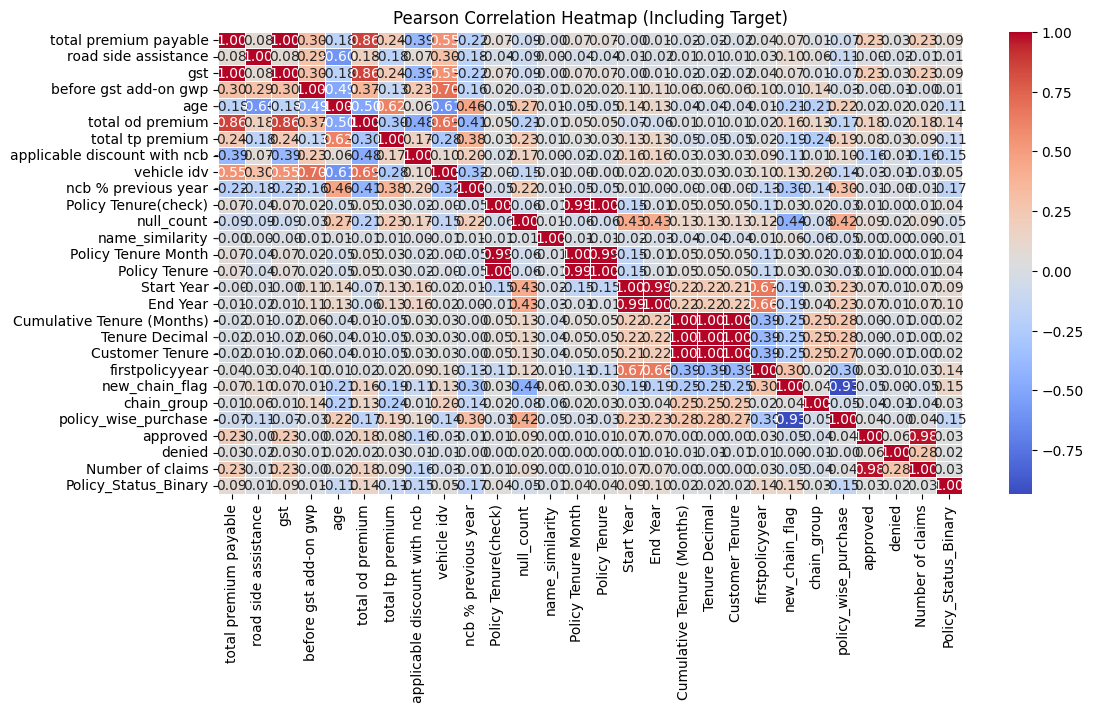

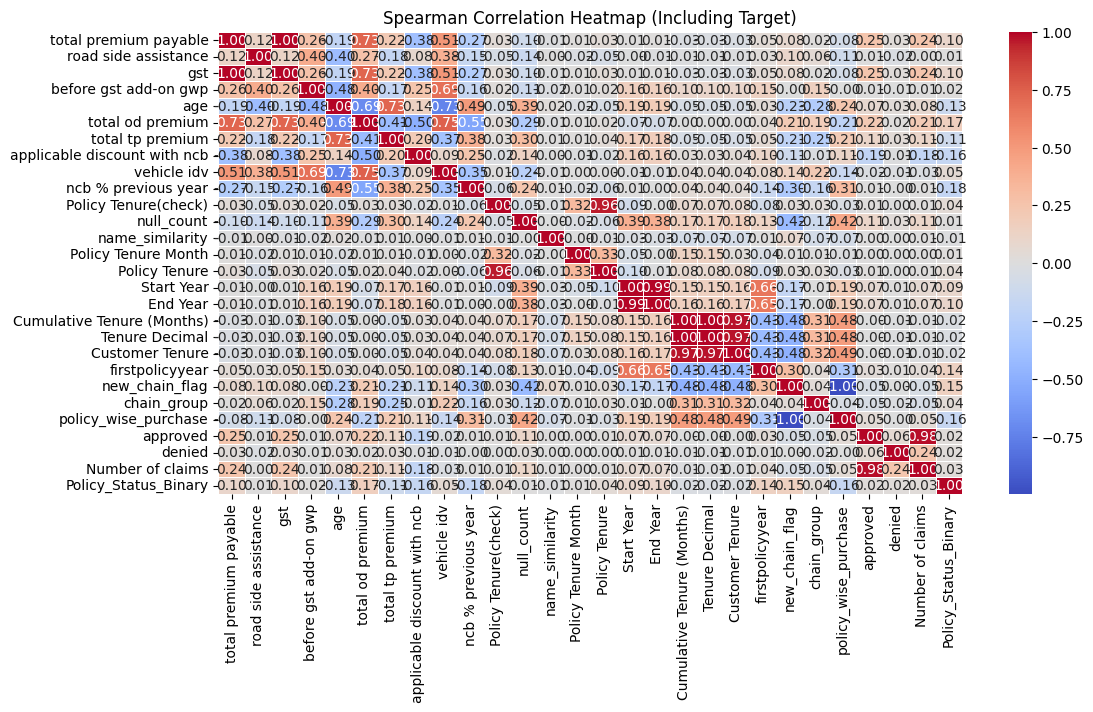


Highly Correlated Numerical Features (Pearson Correlation > 0.9):
gst <--> total premium payable | Correlation: 1.00
Policy Tenure Month <--> Policy Tenure(check) | Correlation: 0.99
Policy Tenure <--> Policy Tenure(check) | Correlation: 1.00
Policy Tenure <--> Policy Tenure Month | Correlation: 0.99
End Year <--> Start Year | Correlation: 0.99
Tenure Decimal <--> Cumulative Tenure (Months) | Correlation: 1.00
Customer Tenure <--> Cumulative Tenure (Months) | Correlation: 1.00
Customer Tenure <--> Tenure Decimal | Correlation: 1.00
policy_wise_purchase <--> new_chain_flag | Correlation: -0.93
Number of claims <--> approved | Correlation: 0.98

Pearson Correlation of Numerical Features with Target (Policy Status Binary):
                              Policy_Status_Binary
ncb % previous year                       0.172110
new_chain_flag                            0.154472
applicable discount with ncb              0.150481
policy_wise_purchase                      0.149188
total od premi

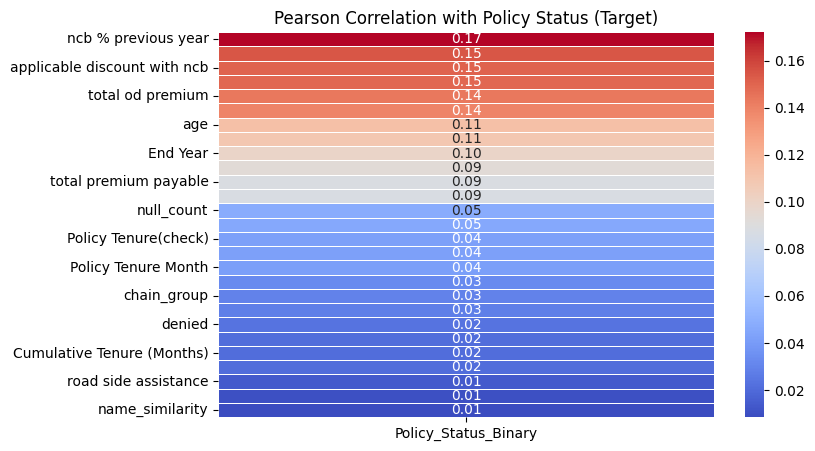

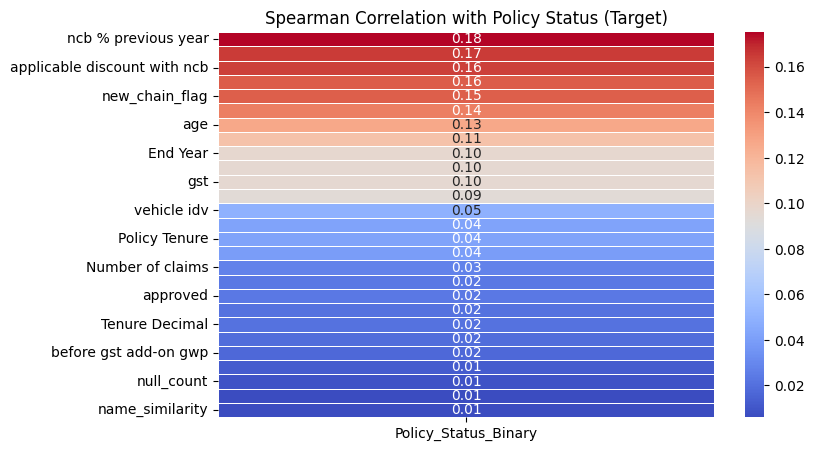


Cramér’s V (Strength of Association with Target):
policy no: Cramér’s V = 0.02524 (Weak)
product name: Cramér’s V = 0.18655 (Moderate)
biztype: Cramér’s V = 0.24307 (Moderate)
chassis number: Cramér’s V = 0.00000 (Weak)
new vertical: Cramér’s V = 0.16049 (Moderate)
zone 2: Cramér’s V = 0.13574 (Moderate)
month: Cramér’s V = 0.18856 (Moderate)
enginenumber: Cramér’s V = 0.00000 (Weak)
rto location: Cramér’s V = 0.19058 (Moderate)
state2: Cramér’s V = 0.16200 (Moderate)
tie up: Cramér’s V = 0.23406 (Moderate)
new branch name 2: Cramér’s V = 0.18342 (Moderate)
manufacturer/make: Cramér’s V = 0.14878 (Moderate)
model: Cramér’s V = 0.19309 (Moderate)
data: Cramér’s V = 0.11381 (Moderate)
insured name: Cramér’s V = 0.11484 (Moderate)
fuel type: Cramér’s V = 0.08222 (Weak)
reg no: Cramér’s V = 0.20989 (Moderate)
variant: Cramér’s V = 0.20091 (Moderate)
Trim Policy No: Cramér’s V = 0.02602 (Weak)
Cleaned insured name: Cramér’s V = 0.12118 (Moderate)
Cleaned Branch Name 2: Cramér’s V = 0.18330

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine
import scipy.stats as stats

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.updated_overall_cleaned_data;'
df = pd.read_sql(query, con=engine)

# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Fill missing values for numerical columns with 0
df[numerical_features] = df[numerical_features].fillna(0)

# Fill missing values for categorical columns with "Missing"
for col in categorical_features:
    df[col] = df[col].fillna("Missing")

df = df[df['Policy Status'].isin(['Renewed', 'Not Renewed'])]
df['Policy_Status_Binary'] = df['Policy Status'].apply(lambda x: 1 if x == 'Not Renewed' else 0)

numerical_features.append("Policy_Status_Binary")  

# Compute Pearson correlation
pearson_corr = df[numerical_features].corr(method="pearson")

# Compute Spearman correlation
spearman_corr = df[numerical_features].corr(method="spearman")

plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap (Including Target)")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap (Including Target)")
plt.show()

# Identify Highly Correlated Features (Pearson > 0.9)
threshold = 0.9
high_corr_features = []

for i in range(len(pearson_corr.columns)):
    for j in range(i):
        if abs(pearson_corr.iloc[i, j]) > threshold:
            high_corr_features.append((pearson_corr.columns[i], pearson_corr.columns[j], pearson_corr.iloc[i, j]))

# Print highly correlated numerical feature pairs (Pearson)
print("\nHighly Correlated Numerical Features (Pearson Correlation > 0.9):")
for feature1, feature2, corr_value in high_corr_features:
    print(f"{feature1} <--> {feature2} | Correlation: {corr_value:.2f}")
 
# Extract correlations with the target variable
target_corr_pearson = pearson_corr[["Policy_Status_Binary"]].drop("Policy_Status_Binary")
target_corr_spearman = spearman_corr[["Policy_Status_Binary"]].drop("Policy_Status_Binary")

# Sort by absolute correlation values
target_corr_pearson_sorted = target_corr_pearson.abs().sort_values(by="Policy_Status_Binary", ascending=False)
target_corr_spearman_sorted = target_corr_spearman.abs().sort_values(by="Policy_Status_Binary", ascending=False)

# Print correlation values with the target column
print("\nPearson Correlation of Numerical Features with Target (Policy Status Binary):")
print(target_corr_pearson_sorted)

print("\nSpearman Correlation of Numerical Features with Target (Policy Status Binary):")
print(target_corr_spearman_sorted)

# Visualize Correlation with Target
plt.figure(figsize=(8, 5))
sns.heatmap(target_corr_pearson_sorted, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation with Policy Status (Target)")
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(target_corr_spearman_sorted, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation with Policy Status (Target)")
plt.show()

# Compute Cramér’s V for Categorical Features
def cramers_v(x, y):
    """ Compute Cramér's V for association between two categorical variables """
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((r_corr-1), (k_corr-1)))

cramers_v_results = {col: cramers_v(df[col], df["Policy_Status_Binary"]) for col in categorical_features}

# Print Cramér’s V results
print("\nCramér’s V (Strength of Association with Target):")
for col, v_value in cramers_v_results.items():
    strength = "Weak" if v_value < 0.1 else ("Moderate" if v_value < 0.3 else "Strong")
    print(f"{col}: Cramér’s V = {v_value:.5f} ({strength})")

# Remove High-Unique and Low-Variance Categorical Features
unique_counts = df[categorical_features].nunique()

# Remove high-cardinality features
high_unique_features = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_unique_features, errors="ignore")

# Remove low-variability features
low_variability_features = unique_counts[unique_counts == 1].index.tolist()
df_filtered = df_filtered.drop(columns=low_variability_features, errors="ignore")

# Remove features related to the target (data leakage)
features_to_remove = ["Policy_Status_Binary"]
df_filtered = df_filtered.drop(columns=features_to_remove, errors="ignore")

# Convert categorical features to numeric
df_encoded = df_filtered.copy()
for col in df_filtered.columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Perform Optimized Chi-Square Test
chi_square_results = []
for col in df_encoded.columns:
    contingency_table = pd.crosstab(df_encoded[col], df["Policy_Status_Binary"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append((col, p))

# Print Chi-Square Results
print("\nRefined Chi-Square Test Results:")
for col, p_val in chi_square_results:
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value = {p_val:.5f} ({significance})")

In [ ]:
# Compute Optimized Information Value (IV)
def calculate_iv(df, feature, target):
    """Optimized IV Calculation using groupby"""
    total_renewed = df[df[target] == 1].shape[0]
    total_not_renewed = df[df[target] == 0].shape[0]

    grouped = df.groupby(feature)[target].agg(["count", "sum"])
    grouped.columns = ["count_total", "count_not_renewed"]

    grouped["count_renewed"] = grouped["count_total"] - grouped["count_not_renewed"]

    grouped["count_not_renewed"] = grouped["count_not_renewed"].replace(0, 0.5)
    grouped["count_renewed"] = grouped["count_renewed"].replace(0, 0.5)

    grouped["dist_not_renewed"] = grouped["count_not_renewed"] / total_not_renewed
    grouped["dist_renewed"] = grouped["count_renewed"] / total_renewed

    grouped["iv"] = (grouped["dist_renewed"] - grouped["dist_not_renewed"]) * np.log(grouped["dist_renewed"] / grouped["dist_not_renewed"])

    return grouped["iv"].sum()

iv_scores = {col: calculate_iv(df, col, "Policy_Status_Binary") for col in df.columns if col not in ["Policy_Status_Binary"]}

# Print IV Scores
print("\nInformation Value (IV) Scores:")
for col, iv_score in iv_scores.items():
    print(f"{col}: IV = {iv_score:.5f}")


Information Value (IV) Scores:
policy no: IV = 1.49772
total premium payable: IV = 1.38915
product name: IV = 1.41357
biztype: IV = 1.49122
road side assistance: IV = 1.21146
gst: IV = 1.28760
chassis number: IV = 1.47495
before gst add-on gwp: IV = 1.42147
age: IV = 1.57690
total od premium: IV = 1.50285
new vertical: IV = 1.33025
zone 2: IV = 1.30569
month: IV = 1.55049
enginenumber: IV = 1.47501
total tp premium: IV = 1.33961
policy end date: IV = 1.58904
applicable discount with ncb: IV = 1.43020
policy start date: IV = 1.58356
rto location: IV = 1.40817
vehicle idv: IV = 2.04709
state2: IV = 1.33567
tie up: IV = 1.52476
new branch name 2: IV = 1.37828
manufacturer/make: IV = 1.30812
model: IV = 1.39780
data: IV = 1.27856
ncb % previous year: IV = 1.35541
insured name: IV = 1.66897
fuel type: IV = 1.23775
reg no: IV = 1.76795
variant: IV = 1.42715
Trim Policy No: IV = 1.49815
Policy Tenure(check): IV = 1.21816
null_count: IV = 3.03245
Cleaned insured name: IV = 1.67844
Cleaned Bra

In [3]:
# Compute Optimized Information Value (IV) for Categorical Features Only
def calculate_iv(df, feature, target):
    """Optimized IV Calculation using groupby"""
    total_renewed = df[df[target] == 1].shape[0]
    total_not_renewed = df[df[target] == 0].shape[0]

    grouped = df.groupby(feature)[target].agg(["count", "sum"])
    grouped.columns = ["count_total", "count_not_renewed"]

    grouped["count_renewed"] = grouped["count_total"] - grouped["count_not_renewed"]

    grouped["count_not_renewed"] = grouped["count_not_renewed"].replace(0, 0.5)
    grouped["count_renewed"] = grouped["count_renewed"].replace(0, 0.5)

    grouped["dist_not_renewed"] = grouped["count_not_renewed"] / total_not_renewed
    grouped["dist_renewed"] = grouped["count_renewed"] / total_renewed

    grouped["iv"] = (grouped["dist_renewed"] - grouped["dist_not_renewed"]) * np.log(grouped["dist_renewed"] / grouped["dist_not_renewed"])

    return grouped["iv"].sum()

# Compute IV for categorical features only
iv_scores_categorical = {col: calculate_iv(df, col, "Policy_Status_Binary") for col in categorical_features if col in df.columns}

# Print IV Scores for Categorical Features
print("\nInformation Value (IV) Scores for Categorical Features:")
for col, iv_score in iv_scores_categorical.items():
    print(f"{col}: IV = {iv_score:.5f}")



Information Value (IV) Scores for Categorical Features:
policy no: IV = 1.49772
product name: IV = 1.41357
biztype: IV = 1.49122
chassis number: IV = 1.47495
new vertical: IV = 1.33025
zone 2: IV = 1.30569
month: IV = 1.55049
enginenumber: IV = 1.47501
rto location: IV = 1.40817
state2: IV = 1.33567
tie up: IV = 1.52476
new branch name 2: IV = 1.37828
manufacturer/make: IV = 1.30812
model: IV = 1.39780
data: IV = 1.27856
insured name: IV = 1.66897
fuel type: IV = 1.23775
reg no: IV = 1.76795
variant: IV = 1.42715
Trim Policy No: IV = 1.49815
Cleaned insured name: IV = 1.67844
Cleaned Branch Name 2: IV = 1.37772
Cleaned State2: IV = 1.33563
Cleaned Zone 2: IV = 1.26221
Cleaned Chassis Number: IV = 1.47006
Cleaned Engine Number: IV = 1.47600
Cleaned Reg no: IV = 1.76255
Cleaned insured name_filled: IV = 1.66919
chassis_engine_key: IV = 1.46977
corrected_name: IV = 1.66765
upd_booked: IV = 32.14762
updated_old_policy_no: IV = 1.48678
Policy Status: IV = 33.42123
customerid_base: IV = 1.6

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sqlalchemy import create_engine
import scipy.stats as stats

# Load Data from PostgreSQL
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}

connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

query = 'SELECT * FROM public.updated_overall_cleaned_data;'
df = pd.read_sql(query, con=engine)

# Separate categorical and numerical columns
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Fill missing values for numerical columns with 0
df[numerical_features] = df[numerical_features].fillna(0)

# Fill missing values for categorical columns with "Missing"
for col in categorical_features:
    df[col] = df[col].fillna("Missing")

df = df[df['Policy Status'].isin(['Renewed', 'Not Renewed'])]
df['Policy_Status_Binary'] = df['Policy Status'].apply(lambda x: 1 if x == 'Not Renewed' else 0)

numerical_features.append("Policy_Status_Binary") 

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Store target variable separately to prevent data leakage
y = df["Policy_Status_Binary"]

# Get unique value counts for categorical features
unique_counts = df[categorical_features].nunique()

# Remove high-cardinality features
high_unique_features = unique_counts[unique_counts > 50].index.tolist()
df_filtered = df.drop(columns=high_unique_features, errors="ignore")

# Remove low-variability features (features with only 1 unique value)
low_variability_features = unique_counts[unique_counts == 1].index.tolist()
df_filtered = df_filtered.drop(columns=low_variability_features, errors="ignore")

# Remove features known to cause data leakage
features_to_remove = ["Policy_Status_Binary"]
df_filtered = df_filtered.drop(columns=features_to_remove, errors="ignore")

# Convert categorical features to numeric
df_encoded = df_filtered.apply(lambda col: col.astype("category").cat.codes)

# Perform Chi-Square Test
chi_square_results = []
for col in df_encoded.columns:
    contingency_table = pd.crosstab(df_encoded[col], y)  
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results.append((col, p))

# Print results
print("\nRefined Chi-Square Test Results:")
for col, p_val in chi_square_results:
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value = {p_val:.5f} ({significance})")


Refined Chi-Square Test Results:
total premium payable: p-value = 0.00000 (Significant)
product name: p-value = 0.00000 (Significant)
biztype: p-value = 0.00000 (Significant)
road side assistance: p-value = 0.00000 (Significant)
gst: p-value = 0.00000 (Significant)
before gst add-on gwp: p-value = 0.00000 (Significant)
age: p-value = 0.00000 (Significant)
total od premium: p-value = 0.00000 (Significant)
new vertical: p-value = 0.00000 (Significant)
zone 2: p-value = 0.00000 (Significant)
total tp premium: p-value = 0.00000 (Significant)
policy end date: p-value = 0.00000 (Significant)
applicable discount with ncb: p-value = 0.00000 (Significant)
policy start date: p-value = 0.00000 (Significant)
vehicle idv: p-value = 0.00000 (Significant)
tie up: p-value = 0.00000 (Significant)
manufacturer/make: p-value = 0.00000 (Significant)
data: p-value = 0.00000 (Significant)
ncb % previous year: p-value = 0.00000 (Significant)
fuel type: p-value = 0.00000 (Significant)
Policy Tenure(check): p

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Store target variable separately to prevent data leakage
y = df["Policy_Status_Binary"]

# Get unique value counts for categorical features
unique_counts = df[categorical_features].nunique()

# Remove high-cardinality features
high_unique_features = unique_counts[unique_counts > 30].index.tolist()
df_filtered = df.drop(columns=high_unique_features, errors="ignore")

# Remove low-variability features (features with only 1 unique value)
low_variability_features = unique_counts[unique_counts == 1].index.tolist()
df_filtered = df_filtered.drop(columns=low_variability_features, errors="ignore")

# Remove features known to cause data leakage
features_to_remove = ["Policy_Status_Binary"]
df_filtered = df_filtered.drop(columns=features_to_remove, errors="ignore")

# Convert categorical features to numeric
df_encoded = df_filtered.apply(lambda col: col.astype("category").cat.codes)

# Perform Chi-Square Test
chi_square_results = []
for col in df_encoded.columns:
    contingency_table = pd.crosstab(df_encoded[col], y)
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi_square_results.append((col, p))

# Print results
print("\nRefined Chi-Square Test Results:")
for col, p_val in chi_square_results:
    significance = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col}: p-value = {p_val:.5f} ({significance})")


Refined Chi-Square Test Results:
total premium payable: p-value = 0.00000 (Significant)
product name: p-value = 0.00000 (Significant)
biztype: p-value = 0.00000 (Significant)
road side assistance: p-value = 0.00000 (Significant)
gst: p-value = 0.00000 (Significant)
before gst add-on gwp: p-value = 0.00000 (Significant)
age: p-value = 0.00000 (Significant)
total od premium: p-value = 0.00000 (Significant)
new vertical: p-value = 0.00000 (Significant)
zone 2: p-value = 0.00000 (Significant)
total tp premium: p-value = 0.00000 (Significant)
policy end date: p-value = 0.00000 (Significant)
applicable discount with ncb: p-value = 0.00000 (Significant)
policy start date: p-value = 0.00000 (Significant)
vehicle idv: p-value = 0.00000 (Significant)
tie up: p-value = 0.00000 (Significant)
data: p-value = 0.00000 (Significant)
ncb % previous year: p-value = 0.00000 (Significant)
fuel type: p-value = 0.00000 (Significant)
Policy Tenure(check): p-value = 0.00000 (Significant)
null_count: p-value 